# Gather the Data

#### First, let's import the necessary libraries that we need to run an analysis.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from time import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
%matplotlib inline

#### Then we'll read in the Stackoverflow 2017 Annual Developer Survey data to be analyzed.

In [5]:
df = pd.read_csv('./survey_results_public.csv') # Read in survey results
schema = pd.read_csv('./survey_results_schema.csv') # Read in survey schema

# Assess the Data

#### View a sample of the data by setting the option to display all columns so that we can view all the columns in the dataset.

In [7]:
pd.set_option('display.max_columns', None) # Show all the columns
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

#### Use the following function to get the description of a question by providing a column name.

In [270]:
# Function provided in the Udacity lessons
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
            
    OUTPUT - desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

#Check the function against solution
get_description(df.columns[0]) # This should return a string of the first column description

'Respondent ID number'

#### Use the above function to get the actual text of a question.

In [271]:
# Provide an example question from the dataset
get_description('PronounceGIF')

'How do you pronounce "GIF"?'

#### Get the value counts of the answer options for a provided question.

In [272]:
gif_vals = df.PronounceGIF.value_counts()
gif_vals

With a hard "g," like "gift"              12694
With a soft "g," like "jiff"               4860
Enunciating each letter: "gee eye eff"     1046
Some other way                              340
Name: PronounceGIF, dtype: int64

#### Calculate the proportion of each answer and graph the proportions.

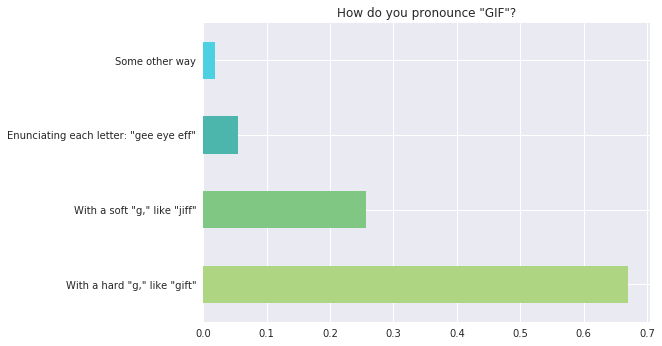

In [273]:
gif_vals = df.PronounceGIF.value_counts(normalize=True)

# Calculate and plot the proportions of responses
with plt.style.context('seaborn'):  
    gif_vals.plot(kind="barh", color = colors1);
    plt.title(get_description('PronounceGIF'));

#### Now, we'll use the above functions for the calculation and visualization of data we'd like to investigate.

In [274]:
# Colors to be used for the graphs
colors1 = ('#AED581','#81C784','#4DB6AC','#4DD0E1','#4FC3F7','#64B5F6','#7986CB','#9575CD','#BA68C8','#F06292','#e57373')
colors2 = ('#e57373','#F06292','#BA68C8','#9575CD','#7986CB','#64B5F6','#4FC3F7','#4DD0E1','#81C784','#AED581')

### How many people already worked from home?

A few days each month                                      0.356748
Never                                                      0.321049
All or almost all the time (I'm full-time remote)          0.116690
Less than half the time, but at least one day each week    0.088883
More than half, but not all, the time                      0.041042
It's complicated                                           0.038431
About half the time                                        0.037156
Name: HomeRemote, dtype: float64

Total repsonses: 16471


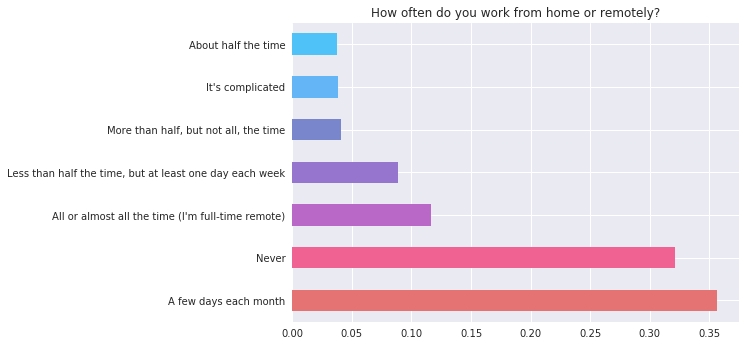

In [275]:
home_remote = df.HomeRemote.value_counts(normalize=True)
totals = df.HomeRemote.value_counts().sum()
print(home_remote)
print('\nTotal repsonses:', totals)

# Calculate and plot the proportions of responses
with plt.style.context('seaborn'):  
    home_remote.plot(kind="barh", color = colors2);
    plt.title(get_description('HomeRemote'));

### How many people liked their jobs?

8.0     0.228349
7.0     0.202386
9.0     0.141546
6.0     0.114666
10.0    0.100243
5.0     0.089818
4.0     0.043795
3.0     0.039205
2.0     0.021111
0.0     0.010096
1.0     0.008785
Name: JobSatisfaction, dtype: float64


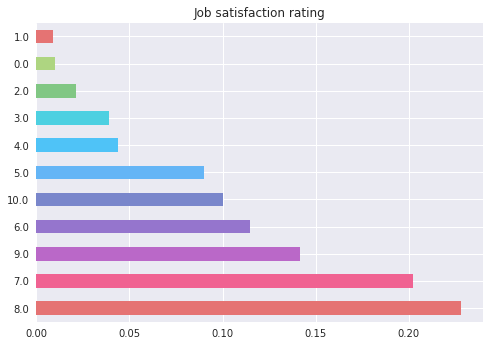

In [276]:
job_sat = df.JobSatisfaction.value_counts(normalize=True)
print(job_sat)

# Calculate and plot the proportions of responses
with plt.style.context('seaborn'):  
    job_sat.plot(kind="barh", color = colors2);
    plt.title(get_description('JobSatisfaction'));

### How many people think they're well paid?

Somewhat underpaid                0.452546
Neither underpaid nor overpaid    0.367091
Greatly underpaid                 0.107832
Somewhat overpaid                 0.067130
Greatly overpaid                  0.005401
Name: Overpaid, dtype: float64


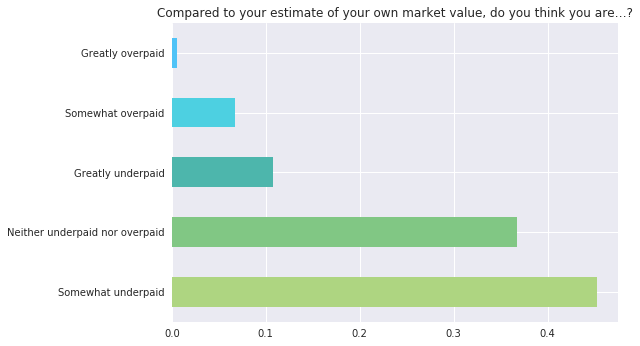

In [277]:
overpaid = df.Overpaid.value_counts(normalize=True)
print(overpaid)

# Calculate and plot the proportions of responses
with plt.style.context('seaborn'):  
    overpaid.plot(kind="barh", color = colors1);
    plt.title(get_description('Overpaid'));

#### Create a function to plot the four columns we want to investigate

In [278]:
def get_resp(df, resp):
    '''
    INPUT - df - pandas dataframe containing the information to be graphed
            resp - list - a list of the names of the columns you would like to know about
    OUTPUT - graphs the provided columns
            returns no values
    '''
    x = [] # list to hold the x-axis values
    y = [] # list to hold the y-axis values
    
    # Colors to be used for graphs
    colors1 = ('#AED581','#81C784','#4DB6AC','#4DD0E1','#4FC3F7','#64B5F6','#7986CB','#9575CD','#BA68C8','#F06292','#e57373')
    colors2 = ('#e57373','#F06292','#BA68C8','#9575CD','#7986CB','#64B5F6','#4FC3F7','#4DD0E1','#81C784','#AED581')
    
    
    if len(resp) == 1:
        for i in resp:
            y_val = df[i].value_counts(normalize=True) # get the value counts as a percentage for the Y axis
            x_val = y_val.to_frame().index # get the index values of the value counts for the X axis  
            x.append(x_val) # add X axis values to a list
            y.append(y_val) # add Y axis values to a list
            
        # Plot the value counts for each column passed to the function
        with plt.style.context('seaborn'):   
            fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))
            fig.suptitle("")
            ax1.barh(x[0], y[0], color=colors2)
            ax1.set_title(resp[0])
            fig.subplots_adjust(wspace=1.0, hspace=0.5)
            
    if len(resp) == 2:
        for i in resp:
            y_val = df[i].value_counts(normalize=True) # get the value counts as a percentage for the Y axis
            x_val = y_val.to_frame().index # get the index values of the value counts for the X axis  
            x.append(x_val) # add X axis values to a list
            y.append(y_val) # add Y axis values to a list

        # Plot the value counts for each column passed to the function
        with plt.style.context('seaborn'):   
            fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 8))
            fig.suptitle("")
            ax1.barh(x[0], y[0], color=colors1)
            ax1.set_title(resp[0])
            ax2.barh(x[1], y[1], color=colors2)
            ax2.set_title(resp[1])
            fig.subplots_adjust(wspace=1.0, hspace=0.5)
            
    
    if len(resp) == 4:
        for i in resp:
            y_val = df[i].value_counts(normalize=True) # get the value counts as a percentage for the Y axis
            x_val = y_val.to_frame().index # get the index values of the value counts for the X axis  
            x.append(x_val) # add X axis values to a list
            y.append(y_val) # add Y axis values to a list

        # Plot the value counts for each column passed to the function
        with plt.style.context('seaborn'):   
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))
            fig.suptitle("")
            ax1.barh(x[0], y[0], color=colors1)
            ax1.set_title(resp[0])
            ax2.barh(x[1], y[1], color=colors2)
            ax2.set_title(resp[1])
            ax3.barh(x[2], y[2], color=colors2)
            ax3.set_title(resp[2]) 
            ax4.barh(x[3], y[3], color=colors1)
            ax4.set_title(resp[3])
            fig.subplots_adjust(wspace=1.0, hspace=0.5)
            
    

#### Use the function above to plot the proportion of answers for each provided question

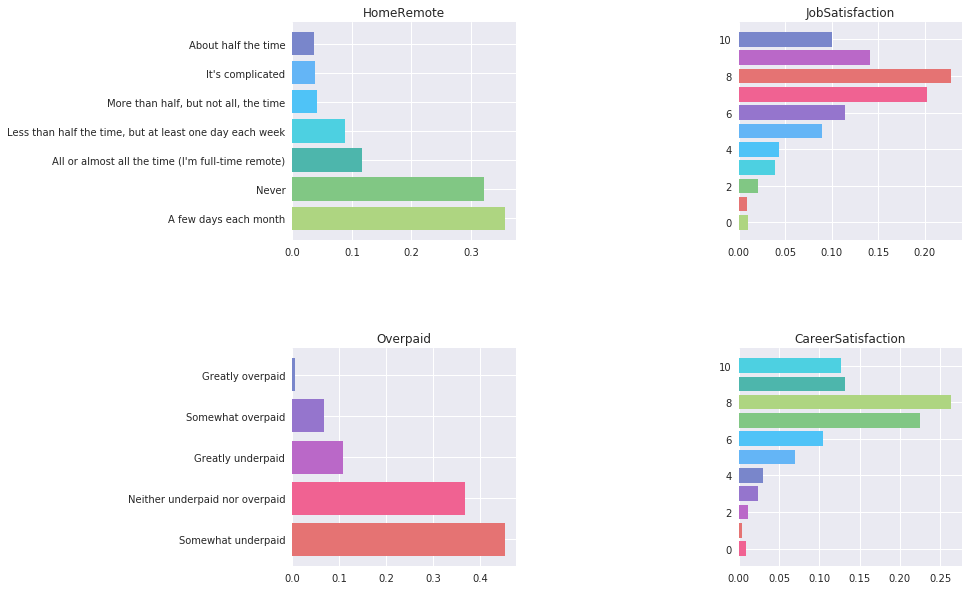

In [279]:
resp = [ 'HomeRemote', 'JobSatisfaction', 'Overpaid', 'CareerSatisfaction']
get_resp(df, resp)

# Clean the Data

#### Re-encode the values for HomeRemote to binary values representing whether a person mostly works from home.

In [280]:
my_df = df.copy()

# Re-encode HomeRemote
def set_home_most(i):
    '''
    INPUT - i - string - the value which you want to convert to a binary value
    OUTPUT - string - the converted binary value
    '''
    if i in ("All or almost all the time (I'm full-time remote)",
                       "More than half, but not all, the time",
                       "About half the time"): # Work from home half or more
        return "Mostly work from home"
    if i in ("It's complicated", "Less than half the time, but at least one day each week",
            "A few days each month", "Never"): # Work from home less than half or never
        return "Mostly work away from home"
    
print('Re-encoding HomeRemote column...')
my_df['HomeWorkMost'] = my_df['HomeRemote'].apply(set_home_most)
print('Re-encoding complete!')
print(my_df['HomeWorkMost'].value_counts())

Re-encoding HomeRemote column...
Re-encoding complete!
Mostly work away from home    13261
Mostly work from home          3210
Name: HomeWorkMost, dtype: int64


#### Re-encode the values for JobSatisfaction to binary values representing whether a person scored their job satisfaction with a 5 or greater.

In [281]:
# Re-encode JobSatisfaction
def set_like(i):
    '''
    INPUT - i - int - the value which you want to convert to a binary value
    OUTPUT - string - the converted binary value
    '''
    if i in (0, 1, 2, 3, 4, 5): # Dislike job
        return "Do not like job"
    if i in (6, 7, 8, 9, 10): # Like job
        return "Like job"
    
print('Re-encoding JobSatisfaction column...')
my_df['LikeJob'] = my_df['JobSatisfaction'].apply(set_like)
print('Re-encoding complete!')
print(my_df['LikeJob'].value_counts())

Re-encoding JobSatisfaction column...
Re-encoding complete!
Like job           12007
Do not like job     3246
Name: LikeJob, dtype: int64


#### Re-encode the values for Overpaid to binary values representing whether a person believes they are well paid.

In [282]:
# Re-encode Overpaid
def set_paid(i):
    '''
    INPUT - i - string - the value which you want to convert to a binary value
    OUTPUT - string - the converted binary value
    '''
    if i in ("Neither underpaid nor overpaid", "Greatly overpaid", "Somewhat overpaid"): # Well paid
        return "Well paid"
    if i in ("Greatly underpaid", "Somewhat underpaid", ): # Underpaid
        return "Underpaid"
    
print('Re-encoding Overpaid column...')
my_df['WellPaid'] = my_df['Overpaid'].apply(set_paid)
print('Re-encoding complete!')
print(my_df['WellPaid'].value_counts())

Re-encoding Overpaid column...
Re-encoding complete!
Underpaid    2905
Well paid    2279
Name: WellPaid, dtype: int64


#### Re-encode the values for Overpaid to binary values representing whether a person believes they are overpaid.

In [283]:
# Re-encode Overpaid
def set_opaid(i):
    '''
    INPUT - i - string - the value which you want to convert to a binary value
    OUTPUT - string - the converted binary value
    '''
    if i in ("Greatly underpaid", "Somewhat underpaid", "Neither underpaid nor overpaid"): # Not overpaid
        return "Not overpaid"
    if i in ("Greatly overpaid", "Somewhat overpaid"): # Overpaid
        return "Overpaid"
    
print('Re-encoding Overpaid column...')
my_df['IsOverpaid'] = my_df['Overpaid'].apply(set_opaid)
print('Re-encoding complete!')
print(my_df['IsOverpaid'].value_counts())

Re-encoding Overpaid column...
Re-encoding complete!
Not overpaid    4808
Overpaid         376
Name: IsOverpaid, dtype: int64


In [284]:
# Re-encode Overpaid
def set_upaid(i):
    '''
    INPUT - i - string - the value which you want to convert to a binary value
    OUTPUT - string - the converted binary value
    '''
    if i in ("Greatly underpaid", "Somewhat underpaid"): # Underpaid
        return "Underpaid"
    if i in ("Greatly overpaid", "Somewhat overpaid", "Neither underpaid nor overpaid"): # Not underpaid
        return "Not underpaid"
    
print('Re-encoding Overpaid column...')
my_df['IsUnderpaid'] = my_df['Overpaid'].apply(set_upaid)
print('Re-encoding complete!')
print(my_df['IsUnderpaid'].value_counts())

Re-encoding Overpaid column...
Re-encoding complete!
Underpaid        2905
Not underpaid    2279
Name: IsUnderpaid, dtype: int64


#### Now, we'll graph the new binary values for each column we're interested in. As we can see, at the time of the survey, a little over 80% of people worked away from home most of the time. Nearly the same proportion of people reported liking the job. A bit less than half of respondents consider themselves to be well paid. Unsurprisingly, most people (over 92%) feel that they are not overpaid, while only about 7% of people do

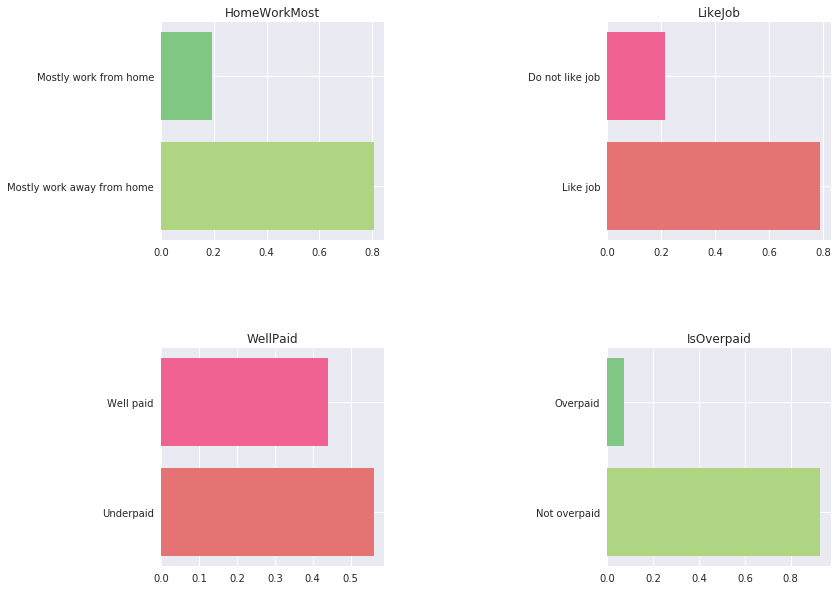

In [285]:
resp = ['HomeWorkMost', 'LikeJob', 'WellPaid', 'IsOverpaid']
get_resp(my_df, resp)

# Analyze & Visualize the Data

#### Create a new dataframe containing just the columns we're interested in, along with their corresponding binary columns.

In [286]:
my_df1 = my_df[['HomeRemote','HomeWorkMost','JobSatisfaction','LikeJob','Overpaid','WellPaid','IsOverpaid']]
my_df1 = my_df1.dropna(axis=0).reset_index(drop=True)

#### Let's investigate the binary columns of whether people work mostly from home and calculate the proportions for whether they report liking their jobs and whether they feel well paid.

In [287]:
# Create a dataframe which groups whether a person liked their job by whether they mostly work from home
homeWork_df = my_df1.groupby(['HomeWorkMost'])['LikeJob'].value_counts(normalize=True)

# Get rid of the rows which contain people who mostly work away from home
homeWork_df = my_df1[my_df1 != "Mostly work away from home"]

# Get the value counts of the dataframe
homeWork_df = homeWork_df.groupby(['HomeWorkMost'])['LikeJob'].value_counts(normalize=True)

C:\Users\allsi\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [288]:
# Create dataframe containing the columns and the corresponding binary columns we are interested in
my_df2 = my_df[['HomeRemote','HomeWorkMost','JobSatisfaction','LikeJob','Overpaid','WellPaid']]
my_df2 = my_df2.dropna(axis=0).reset_index(drop=True)

# Create dataframes for the inner and outer rings for a nested pie chart
outer_df = my_df2[['HomeRemote','JobSatisfaction','Overpaid']]
inner_df = my_df2[['HomeWorkMost','LikeJob','WellPaid']]

home_work_df = inner_df.drop(['LikeJob', 'WellPaid'], axis=1)
at_home = len(home_work_df.drop(home_work_df.loc[home_work_df['HomeWorkMost']=="Mostly work away from home"].index, axis=0))
away_home = len(home_work_df) - at_home

like_job_df = inner_df[my_df2 != "Do not like job"]
well_paid_df = inner_df[my_df2 != "Underpaid"]

like_job_df = inner_df.drop(['HomeWorkMost', 'WellPaid'], axis=1)
like_it = len(like_job_df.drop(like_job_df.loc[like_job_df['LikeJob']=="Do not like job"].index, axis=0))
dislike_it = len(home_work_df) - like_it

well_paid_df = inner_df.drop(['HomeWorkMost', 'LikeJob'], axis=1)
paid_well = len(well_paid_df.drop(well_paid_df.loc[well_paid_df['WellPaid']=="Underpaid"].index, axis=0))
not_paid_well = len(well_paid_df) - paid_well

In [289]:
# Create names and size values for the groups and subgroups for the nested pie chart
group_names=['HomeRemote', 'JobSatisfaction', 'Overpaid']
group_size=[len(outer_df['HomeRemote']),len(outer_df['JobSatisfaction']),len(outer_df['Overpaid'])]

subgroup_names=['Mostly at home', 'Mostly away from home', 'Likes job', 'Dislikes job', 'Well paid', 'Underpaid']
subgroup_size=[at_home, away_home,
              like_it, dislike_it,
              paid_well, not_paid_well]

### What proportions of people work mainly from home, like their job, and think they're well paid?

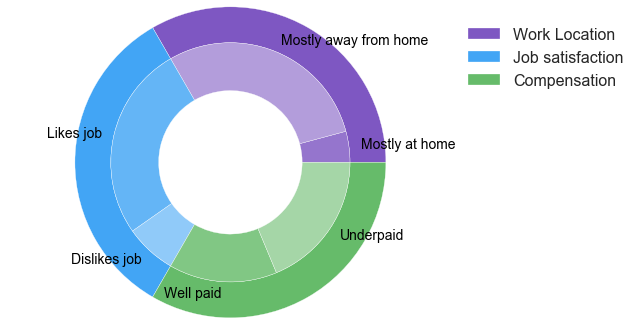

In [290]:
# Create the nested pie chart using the dataframes above
# With help from https://python-graph-gallery.com/163-donut-plot-with-subgroups/
with plt.style.context('seaborn'): 
    # First Ring (outside)
    fig, ax = plt.subplots()
    ax.axis('equal')
    mypie1, _ = ax.pie(group_size, radius=1.3, labels=None, colors=['#7E57C2', '#42A5F5', '#66BB6A'] )
    plt.setp(mypie1, width=0.3, edgecolor='white')

    # Second Ring (Inside)
    mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=1.1,
                       colors=['#9575CD', '#B39DDB', '#64B5F6', '#90CAF9', '#81C784', '#A5D6A7'],
                      textprops = dict(color ='black', size=14))
    plt.setp(mypie2, width=0.4, edgecolor='white')
    plt.margins(0,0)
    plt.legend(['Work Location', 'Job satisfaction', 'Compensation'], fontsize=16, bbox_to_anchor=(1.0, 1.0))

    # show it
    plt.show()


#### Since we are mostly concerned with people who work from home, let's take a look at just those poeple. The data indicates that out of those people who reported work from home about half the time or more, just 17% dislike their job.

In [291]:
def func(pct, allvalues):
    '''
    INPUT - pct - float - the value which you want to convert to a percentage
            allvalues - the total values to be used for calculating a percentage
    OUTPUT - string - formatted string of the calculated percentage
    '''
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%".format(pct, absolute)

In [294]:
# Create a dataframe containing only those people who mostly work from home and liked their job,
# and whether they feel well paid
pd.set_option('display.max_rows', None) # Show all the columns
likeJob_df = my_df1[my_df1 != "Do not like job"]
likeJob_df = likeJob_df[my_df1 != "Mostly work away from home"]
likeJob_df = likeJob_df.groupby(['LikeJob','HomeWorkMost'])['WellPaid'].value_counts(normalize=True)

C:\Users\allsi\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


### What proportion of people both mainly work from home and like their jobs?

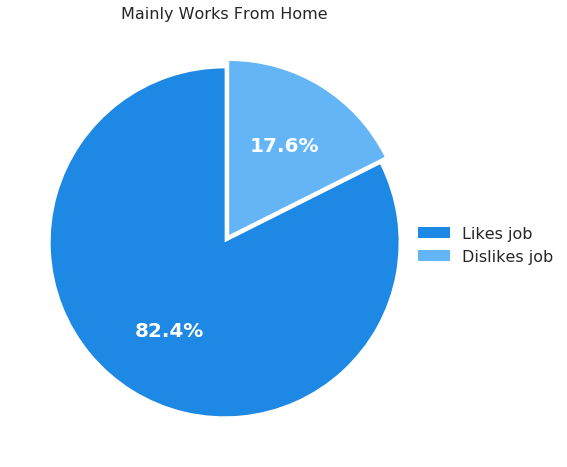

In [295]:
# Graph the proportions of those who mainly work from home and how they feel about their job
work_labels = ['Likes job', 'Dislikes job']
with plt.style.context('seaborn'):  
    homeWork_df.plot(kind='pie', colors=("#1E88E5", "#64B5F6"), startangle=90, explode=(0,.05),
                    autopct = lambda pct: func(pct, likeJob_df), 
                    textprops = dict(color ="white", size=20, fontweight='bold'),
                    figsize=(8,8), labels=None, label='')
    plt.legend(loc='upper center', labels=work_labels, fontsize=16, bbox_to_anchor=(1.1, .57))
    plt.title("Mainly Works From Home", fontsize=16)

### What proportion of people that mainly work from home and like their jobs think they're well paid?

#### Let's now look at the proportion of those who work from home about half the time or more and whether they believe they are well paid.

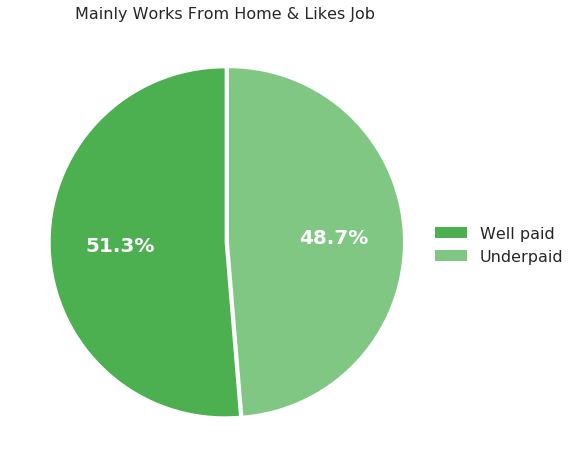

In [129]:
# Graph the proportions of those who mainly work from home and like their jobs,
# and whether they feel well paid
work_labels = ['Well paid', 'Underpaid']
with plt.style.context('seaborn'):  
    likeJob_df.plot(kind='pie', colors=("#4CAF50", "#81C784"), startangle=90, explode=(0,.025),
                    autopct = lambda pct: func(pct, likeJob_df), 
                    textprops = dict(color ="white", size=20, fontweight='bold'),
                    figsize=(8,8), labels=None, label='')
    plt.legend(work_labels, fontsize=16, bbox_to_anchor=(.95, .57))
    plt.title("Mainly Works From Home & Likes Job", fontsize=16)

### Is it worth it?

#### The data indicates that out of those people who reported work from home about half the time or more and like their job, a little more than half believe they are well paid, barely edging out those who feel underpaid. This leads me to conclude that they do believe that working from home is worth it.

# Model the Data

#### And for fun, here's a machine learning algorithm tested on the data to see how well it can predict whether a person liked their job.

In [203]:
# Creates a function to clean data
def clean_data(df, response_col, dummy_nans=False, classification=True):
     '''
    INPUT - df - pandas dataframe - the dataframe containing the data to be cleaned
            response_col - string - the name of the response column to be used as the target
            dummy_nans - boolean - used for whether you want to dummy NaN values
            classification - boolean - used for whether you're cleaning data for classification or regression
    OUTPUT - X - pandas dataframe - cleaned explanatory values
             y - pandas dataframe - cleaned response values
    '''
    start_time = time()
    
    # Create a list of categorical columns in the dataframe
    # If the response column is one of the categorical columns, drop it from the list
    cat_df = df.select_dtypes(include=['object'])
    if response_col in cat_df:
        cat_df = cat_df.drop([response_col], axis=1)
    cat_cols = cat_df.columns
    
    # Drop the rows with NaNs in the response column (y)
    # In order to properly make predictions, the response column should contain
    # no missing values and should hold values that we know to be true.
    df = df.dropna(subset=[response_col], axis=0)

    # Drop columns that are completely full of NaN values.
    # Columns which are totally empty are not useful for prediction.
    df = df.dropna(how='all', axis=1)
    
    # Add dummies for the categorical columns
    # In order to make the model as accurate as possible, column values
    # are converted to binary values, called dummies, to indicate whether
    # a respondent chose a certain categorical option as an answer to the survey question.
    print('Adding dummies...')
    for col in cat_cols:
        try:
            # for each categorical column, add dummy variable, drop original column
            df = pd.concat([df.drop(col, axis=1), 
                            pd.get_dummies(df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=dummy_nans)], axis=1)
        except:
            continue
    print('Dummies added!\n')
    
    # If using a classification algorithm then re-encode the categorical
    # values for the target response column
    if classification == True:
        # Re-encode response values
        def set_likes(i):
            if i in (0, 1, 2, 3, 4, 5): # Dislike job
                return 0
            if i in (6, 7, 8, 9, 10): # Like job
                return 1
    
        print('Re-encoding the response column...')
        df[response_col] = df[response_col].apply(set_likes)
        print('Re-encoding complete!\n')
    
    # Fill NaNs in numerical columns with their column mean
    # so they are not empty but also don't mess with the mean value
    # of the entire column
    print('Filling missing numeric values with column means...')
    fill_mean = lambda col: col.fillna(col.mean())
    df = df.apply(fill_mean, axis=0)
    print('Complete!\n')
    
    # Scale the numerical values for improved prediction
    print('Scaling numerical values...')
    scaler = StandardScaler()
    scaler.fit_transform(df.select_dtypes(include=['number']))
    print('Scaling complete!')
    
    # Split into explanatory (X) and response (y) variables to be
    # fed to a machine learning algorithm for prediction
    X = df.drop(response_col, axis=1)
    y = df[response_col]
    
    end_time = time()
    print('\nFinished! That took %3.1f minutes.' % ((end_time-start_time)/60))
    
    return X, y

In [210]:
# Creates a function to fit data to an AdaBoostClassifier model to predict whether a person is
# likely to like their job. Since a binary value is being predicted, a classification model is used.
def fit_abc(df, response_col, test_size=.3, rand_state=42):
    '''
    INPUT - df - pandas dataframe - the dataframe containing the data to be fitted
            response_col - string - the name of the response column to be used as the target
            test_size - float - used to determine the proportion of test data
            rand_state - int - for getting consistent results each time the function is called
    OUTPUT - best_model - AdaBoost Classifier model - the best model with the best tuned hyperparameters
    '''
    start_time = time()

    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    
    # Instantiate model
    model = AdaBoostClassifier(random_state=42)
    
    print('\nFinding the best estimator...\n')

    # Choose several hyperparameters for tuning the model
    grid_values = {'n_estimators' : [100, 200], # best is 200
                  'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.5]}  # best is 0.1
    grid_model = GridSearchCV(model, param_grid = grid_values, scoring = 'f1')
    grid_model.fit(X_train, y_train)

    # Make predictions using the Grid Search model
    y_test_pred = grid_model.predict(X_test)

    print('Best estimator:', grid_model.best_estimator_)
    print('Best parameters:', grid_model.best_params_)
    print()

    # Set the model to the best estimator and fit your training data to it
    best_model = grid_model.best_estimator_
    best_model.fit(X_train, y_train)

    # Make predictions using the best estimator
    y_test_pred = best_model.predict(X_test)

    # Calculating accuracies
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Print the scores of the best estimator
    print('The test accuracy is', test_accuracy)
    print('The test recall is', test_recall)
    print('The test precision is', test_precision)
    print('The test f1 is', test_f1)
    
    end_time = time()
    print('\nFinished! That took %3.1f minutes.' % ((end_time-start_time)/60))
    
    return best_model

In [211]:
# Create a copy of the original data, set a target response column, clean the data, and fit an SVC model
df_new = df.copy()
response_col = 'JobSatisfaction'
X, y = clean_data(df_new, response_col, classification=True)
svc_model = fit_abc(X, y)

Adding dummies...
Dummies added!

Re-encoding the response column...
Re-encoding complete!

Filling missing numeric values with column means...
Complete!

Scaling numerical values...
Scaling complete!

Finished! That took 0.8 minutes.

Finding the best estimator...

Best estimator: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=200, random_state=42)
Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}

The test accuracy is 0.8568618881118881
The test recall is 0.9567867036011081
The test precision is 0.8737667594232229
The test f1 is 0.913394155758297

Finished! That took 188.9 minutes.


#### Yeah, it took a long time but those scores are actually quite good!